**IMPORTING DEPENDIES**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


**LOADING THE MNIST DATA FORM KERAS.DATASETS**

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
type(x_train)

numpy.ndarray

In [9]:
#shape of the numpy array
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


training_data=60000 images
test_data=10000 images

Image dimension ----> 28 x 28
grayscale images----> 1 channel


In [10]:
#printing the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [11]:
print(x_train[10].shape)

(28, 28)


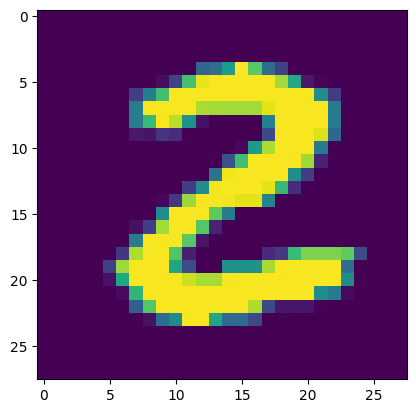

2


In [19]:
#display the images
plt.imshow(x_train[25])
plt.show()
#printing the corresponding label
print(y_train[25])


**IMAGES LABELS**

In [20]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [22]:
#unique values in y_train
print(np.unique(y_train))

#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can also apply one hot encoding

All the images having the same dimension in the datasets, if not, we have to resize all the images to the common dimension

In [23]:
#sacling the values
x_train=x_train/255
x_test=x_test/255

In [24]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**BUILDING NEURAL NETWORK**

In [26]:
#setting up the layers of the neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])

In [27]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
#training the neural network
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2948 - accuracy: 0.9146
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1387 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1035 - accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0726 - accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0546 - accuracy: 0.9828
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0479 - accuracy: 0.9851
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0421 - accuracy: 0.9859
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

Training data accuracy = 98.9%

**ACCURACY ON TEST DATA**

In [30]:
loss,accuracy = model.evaluate(x_test,y_test)

print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0886 - accuracy: 0.9745
0.9745000004768372


Test data accuracy = 97.1%

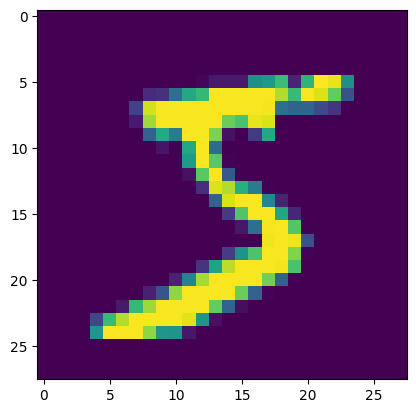

In [31]:
#first data point in x_test
plt.imshow(x_train[0])
plt.show()


In [32]:
print(y_test[0])

7


In [33]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [34]:
print(y_pred.shape)

(10000, 10)


In [35]:
print(y_pred[0])

[1.0222145e-04 9.9368615e-04 2.1265645e-01 9.8198545e-01 1.3819764e-08
 1.0961117e-05 1.6020468e-13 9.9967009e-01 1.1528200e-02 2.7552070e-02]


model.predict() gives the prrediction probablity of each class for that data point

In [38]:
#converting the predicton probablity to class model
label_for_1_test_image = np.argmax(y_pred[0])
print(label_for_1_test_image)

7


In [39]:
#converting the predicton probablity to class model for all test points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 5, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test--. true labels
y_pred_labels--->predicted labels

**CONFUSION MATRIX**

In [40]:
conf_mat = confusion_matrix(y_test,y_pred_labels)

In [41]:
print(conf_mat)

tf.Tensor(
[[ 958    0    1    2    1    6    6    1    3    2]
 [   0 1131    3    0    0    0    0    0    1    0]
 [   1    3 1004    6    1    0    3    6    8    0]
 [   1    2    6  977    0    8    0    6    6    4]
 [   0    1    2    0  962    0    6    2    1    8]
 [   1    0    0    7    1  872    2    0    7    2]
 [   1    1    2    1    1   13  934    1    4    0]
 [   1    8    8    6    1    0    0  993    3    8]
 [   1    2    1    7    4    6    2    1  948    2]
 [   1    3    1    4   16    5    1    5    7  966]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'Truth')

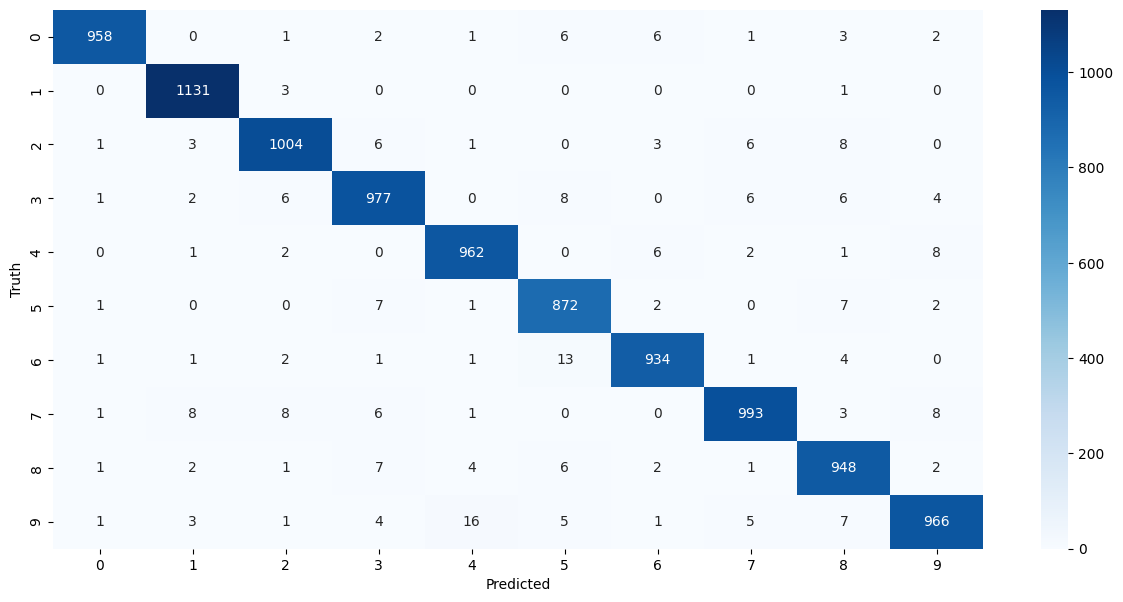

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**BUILDING A PREDICTIVE SYSTEM**

In [43]:
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)


In [44]:
type(input_image)

numpy.ndarray

In [46]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


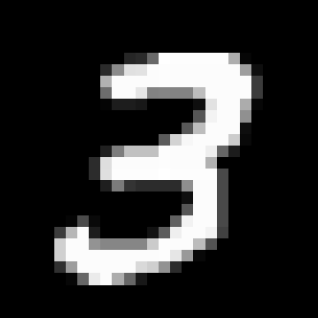

In [47]:
cv2_imshow(input_image)

In [48]:
input_image.shape

(318, 318, 3)

In [49]:
gray_image = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [50]:
gray_image.shape

(318, 318)

In [51]:
input_image_resize = cv2.resize(gray_image,(28,28))

In [52]:
input_image_resize.shape

(28, 28)

In [53]:
cv2_imshow(input_image_resize)

In [54]:
input_image_resize = input_image_resize/255

In [55]:
image_reshaped = np.reshape(input_image_resize,(1,28,28))

In [56]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 44ms/step
[[6.1751576e-10 1.5522137e-05 6.3491003e-05 1.0000000e+00 1.1753913e-13
  5.6554895e-04 5.9475922e-21 1.8297012e-03 5.3384253e-03 3.8024131e-02]]


In [57]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


**PREDICTIVE SYSTEM**

Path of the image to be predicted:/content/MNIST_digit.png


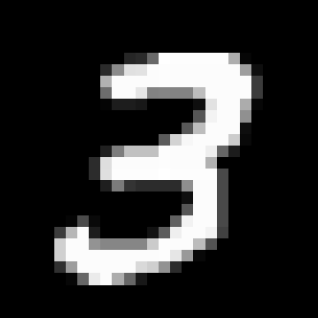

1/1 [==============================] - 0s 33ms/step
The Handwritten Digit is recognised as 3


In [58]:
input_image_path =input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
gray_image = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(gray_image,(28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize,(1,28,28))
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as',input_pred_label)